# Financial StatementsAnalysis

## Introduction
This notebook aims to analyze financial data to extract insights and make forecasts on income and cash flows. By examining the available financial data, we can gain a better understanding of the financial performance of a company and make informed decisions.

## Dataset
The dataset used in this analysis consists of financial statements such as income statements and cash flow statements. These statements provide valuable information about the revenue, expenses, profitability, and cash flow of a company.

## Analysis Steps
1. Data Retrieval: Retrieve the financial data from a reliable source, such as an API or a CSV file.
2. Data Cleaning: Perform necessary data cleaning steps, including handling missing values, removing duplicates, and standardizing formats.
3. Exploratory Data Analysis: Explore the dataset to gain insights into the financial performance of the company. Visualize the data using graphs and charts to identify trends, patterns, and anomalies.
4. Financial Metrics Calculation: Calculate key financial metrics, such as revenue growth rate, profitability ratios, and cash flow ratios, to assess the company's financial health.
5. Forecasting: Use statistical methods or machine learning algorithms to forecast future income and cash flows based on historical data. Evaluate the accuracy of the forecasts and make recommendations based on the results.
6. Visualization: Present the findings and forecasts through informative visualizations, such as line charts, bar graphs, and tables, to effectively communicate the insights to stakeholders.


## Import the Data

In [ ]:
#Load libraries 
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#load API key for the income statement
#api_key = 
#We are interested in Apple's data
company = 'AAPL'
#Specify a time period of interest. I am not subcribed to a plan yet so the API limits me to 5 years. Let's work with that for now
#Obviously the 
years = 5


In [ ]:
#send a request for the income statement
response_i = requests.get(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey=4fe844f889c337451ca5a246adb24986")
# Extract the JSON data from the response
data = response_i.json()

# Access the income statement data (adjust this based on the structure of your JSON)
income_statement = data
#send a request for the cashflow statement

#sent a request for the balance sheet

Let's have a quick look at ust the revenue and profits line items

In [ ]:
#Plot revenue and profts
#create a list for revenues
#reversed because income statment[0], gives you the most resent years and income_statment[10] gives you 10 years befor y0
revenues = list(reversed([income_statement[i]['revenue'] for i in range(len(income_statement))]))
profits = list(reversed([income_statement[i]['grossProfit'] for i in range(len(income_statement))]))

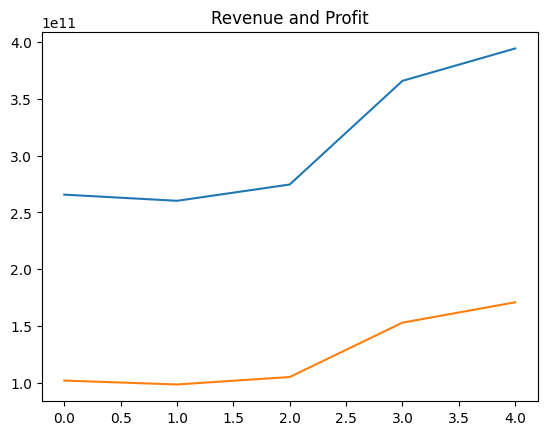

In [ ]:
plt.plot(revenues, label = "Revenue")
plt.plot(profits, label = 'Gross Profit')
plt.title("Revenue and Profit")
plt.show()


In [ ]:
#converting json into pandas

df_income = pd.read_json(f"https://financialmodelingprep.com/api/v3/income-statement/{company}?limit={years}&apikey=4fe844f889c337451ca5a246adb24986")

## Exploratory Data Analysis

### Basic Analysis

For a practical example, we will be looking at the Medical Claims Data. Using these four commands, we will perform a basic analysis:

    - df.head()
    - df.shape
    - df.info()
    - df.describe()

In [ ]:
df_income.shape

In [ ]:
df_income.head()

,date,symbol,reportedCurrency,cik,fillingDate,acceptedDate,calendarYear,period,revenue,costOfRevenue,...,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil,link,finalLink
0,2022-09-24,AAPL,USD,320193,2022-10-28,2022-10-27 18:01:14,2022,FY,394328000000,223546000000,...,0.302040,19300000000,99803000000,0.253096,6.15,6.11,16215963000,16325819000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
1,2021-09-25,AAPL,USD,320193,2021-10-29,2021-10-28 18:04:28,2021,FY,365817000000,212981000000,...,0.298529,14527000000,94680000000,0.258818,5.67,5.61,16701272000,16864919000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
2,2020-09-26,AAPL,USD,320193,2020-10-30,2020-10-29 18:06:25,2020,FY,274515000000,169559000000,...,0.244398,9680000000,57411000000,0.209136,3.31,3.28,17352119000,17528214000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
3,2019-09-28,AAPL,USD,320193,2019-10-31,2019-10-30 18:12:36,2019,FY,260174000000,161782000000,...,0.252666,10481000000,55256000000,0.212381,2.99,2.97,18471336000,18595652000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...
4,2018-09-29,AAPL,USD,320193,2018-11-05,2018-11-05 08:01:40,2018,FY,265595000000,163756000000,...,0.274489,13372000000,59531000000,0.224142,3.00,2.98,19821508000,20000436000,https://www.sec.gov/Archives/edgar/data/320193...,https://www.sec.gov/Archives/edgar/data/320193...


In [ ]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 38 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   date                                     5 non-null      datetime64[ns]
 1   symbol                                   5 non-null      object        
 2   reportedCurrency                         5 non-null      object        
 3   cik                                      5 non-null      int64         
 4   fillingDate                              5 non-null      object        
 5   acceptedDate                             5 non-null      object        
 6   calendarYear                             5 non-null      int64         
 7   period                                   5 non-null      object        
 8   revenue                                  5 non-null      int64         
 9   costOfRevenue                            5 non-

### Univariate Analysis: Non-Graphical

For the univariate analysis we will be looking at the **descriptive statistics** of each feature. We can get the descriptive statistics of each numerical feature by using the following command:

    - df.describe()


In [ ]:
df_income.describe()

,cik,calendarYear,revenue,costOfRevenue,grossProfit,grossProfitRatio,researchAndDevelopmentExpenses,generalAndAdministrativeExpenses,sellingAndMarketingExpenses,sellingGeneralAndAdministrativeExpenses,...,totalOtherIncomeExpensesNet,incomeBeforeTax,incomeBeforeTaxRatio,incomeTaxExpense,netIncome,netIncomeRatio,eps,epsdiluted,weightedAverageShsOut,weightedAverageShsOutDil
count,5.0,5.000000,5.000000e+00,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.0,5.0,5.000000e+00,...,5.000000e+00,5.000000e+00,5.000000,5.000000e+00,5.000000e+00,5.000000,5.000000,5.000000,5.000000e+00,5.000000e+00
mean,320193.0,2020.000000,3.120858e+11,1.863248e+11,1.257610e+11,0.398967,1.947400e+10,0.0,0.0,2.038660e+10,...,9.078000e+08,8.680820e+10,0.274425,1.347200e+10,7.333620e+10,0.231515,4.224000,4.190000,1.771244e+10,1.786301e+10
std,0.0,1.581139,6.308450e+10,2.953287e+10,3.359359e+10,0.024846,4.755189e+09,0.0,0.0,3.280182e+09,...,9.984612e+08,2.535142e+10,0.026071,3.821451e+09,2.194959e+10,0.023089,1.553763,1.539756,1.450502e+09,1.464290e+09
min,320193.0,2018.000000,2.601740e+11,1.617820e+11,9.839200e+10,0.378178,1.423600e+10,0.0,0.0,1.670500e+10,...,-3.340000e+08,6.573700e+10,0.244398,9.680000e+09,5.525600e+10,0.209136,2.990000,2.970000,1.621596e+10,1.632582e+10
25%,320193.0,2019.000000,2.655950e+11,1.637560e+11,1.018390e+11,0.382332,1.621700e+10,0.0,0.0,1.824500e+10,...,2.580000e+08,6.709100e+10,0.252666,1.048100e+10,5.741100e+10,0.212381,3.000000,2.980000,1.670127e+10,1.686492e+10
50%,320193.0,2020.000000,2.745150e+11,1.695590e+11,1.049560e+11,0.383437,1.875200e+10,0.0,0.0,1.991600e+10,...,8.030000e+08,7.290300e+10,0.274489,1.337200e+10,5.953100e+10,0.224142,3.310000,3.280000,1.735212e+10,1.752821e+10
75%,320193.0,2021.000000,3.658170e+11,2.129810e+11,1.528360e+11,0.417794,2.191400e+10,0.0,0.0,2.197300e+10,...,1.807000e+09,1.092070e+11,0.298529,1.452700e+10,9.468000e+10,0.253096,5.670000,5.610000,1.847134e+10,1.859565e+10
max,320193.0,2022.000000,3.943280e+11,2.235460e+11,1.707820e+11,0.433096,2.625100e+10,0.0,0.0,2.509400e+10,...,2.005000e+09,1.191030e+11,0.302040,1.930000e+10,9.980300e+10,0.258818,6.150000,6.110000,1.982151e+10,2.000044e+10


### Univariate Analysis: Graphical

here look at the **distribution** of any numerical feature by using the following plots:

    - histogram
    - box plot
    

We'll also assess the correlation amongst the numerial features